In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


## Table of Contents
* [Load Dataset](#load)
<!--     * [Section 1.1](#section_1_1) -->
* [Data Summarization Statistics](#summary)
* [Handling Missing Data](#missing)
* [Data Transformation](#transform)
* [Data Visualization](#visualization)
<!--         * [Pie Chart (Type)](#pie)
        * [Bar Plot (Top 10 Countries)](#bar)
        * [Box Plot (Release Year of Top 10 Countries)](#box)
        * [Scatter Plot (Release Year vs. Year Added)](#scatter)
        * [QQ Plot (Release Year vs. Year Added)](#qq)
        * [Density Histogram Plot (Movies Duration)](#densehisto)
        * [Scatter Plot (Duration)](#scatter2)
        * [Bar Plot (TV Shows Seasons)](#bar2)
        * [Histogram (Release Year of Each Type)](#histo)
        * [Bar Plot (Ratings - Recommended Ages)](#bar_rating)
        * [Heat Map (Year and Month Added)](#heatmap) -->
* [Correlation Analysis](#correlation)

<!-- * [Dealing with Outliers](#outliers)
* [Regression  (Supervised Learning)](#regression)
* [Regression Algorithms](#regalgo)
* [Classification  (Supervised Learning)](#classification) -->

***

# **Load Dataset** <a class="anchor"  id="load"></a>

In [104]:
df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
df.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


***

# **Data Summarization Statistics** <a class="anchor"  id="summary"></a>

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [106]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [107]:
df.duplicated().sum()

0

In [108]:
number_of_values=df.nunique()
print(number_of_values)

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64


In [109]:
print('Unique Values of Occupation are', df['Occupation'].unique())
print('\nUnique Values of BMI Category are', df['BMI Category'].unique())
print('\nUnique Values of Sleep Disorder are', df['Sleep Disorder'].unique())

Unique Values of Occupation are ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Unique Values of BMI Category are ['Overweight' 'Normal' 'Obese' 'Normal Weight']

Unique Values of Sleep Disorder are [nan 'Sleep Apnea' 'Insomnia']


# **Handling Missing Data** <a class="anchor"  id="missing"></a>

In [110]:
missing_data = df.isna().sum()
missing_data_df = pd.DataFrame(missing_data).reset_index()
missing_data_df.columns = ['Column', 'Missing']
missing_data_df

,Column,Missing
0,Person ID,0
1,Gender,0
2,Age,0
3,Occupation,0
4,Sleep Duration,0
5,Quality of Sleep,0
6,Physical Activity Level,0
7,Stress Level,0
8,BMI Category,0
9,Blood Pressure,0


In [111]:
df.fillna('None', inplace = True)

In [112]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [113]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


***

# **Data Transformation** <a class="anchor"  id="transform"></a>

In [114]:
df["High Pressure"] = 0
df["Low Pressure"] = 0

for i, val in enumerate(df["Blood Pressure"]):
    j = 0
    
    while val[j] != "/":
        j += 1
        continue
        
    df.loc[i, "High Pressure"] = int(val[:j])
    df.loc[i, "Low Pressure"] = int(val[(j+1):])

df.drop("Blood Pressure", axis=1)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,High Pressure,Low Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [115]:
df.loc[df["BMI Category"] == "Normal Weight", "BMI Category"] = "Normal"
df.loc[df["BMI Category"] == "Obese", "BMI Category"] = "Overweight"

In [116]:
print('\nUnique Values of BMI Category are', df['BMI Category'].unique())
print('\nUnique Values of Sleep Disorder are', df['Sleep Disorder'].unique())


Unique Values of BMI Category are ['Overweight' 'Normal']

Unique Values of Sleep Disorder are ['None' 'Sleep Apnea' 'Insomnia']


***

# **Data Visualization** <a class="anchor"  id="visualization"></a>

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import probplot

**Analysis of Categorical values (in relation to Sleep Duration)**

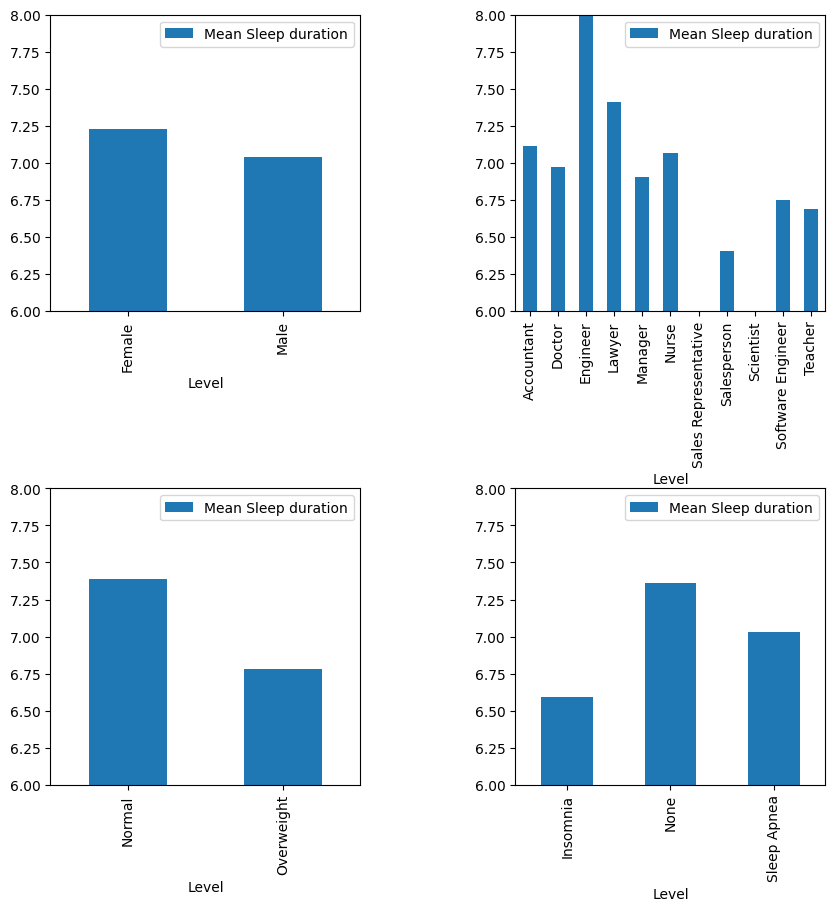

In [118]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.6)

categorical = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for i,cat in enumerate(categorical):
    mean_values = df.groupby(cat)['Sleep Duration'].mean()
    temp_df = df.isna().sum()
    temp_df = pd.DataFrame(mean_values).reset_index()
    temp_df.columns = ['Level', 'Mean Sleep duration']
    temp_df.plot(kind='bar', x='Level', y='Mean Sleep duration', ax=axs[int(i/2), i%2])
    axs[int(i/2), i%2].set_ylim(6,8)

plt.show()


**Plotting against sleep duration**

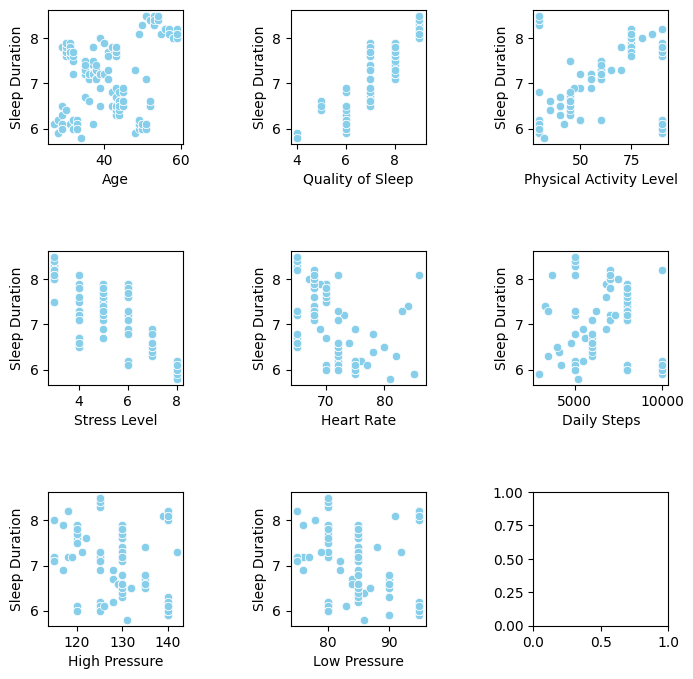

In [119]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

numeric_x = ["Age", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "High Pressure", "Low Pressure"]

for i, cat in enumerate(numeric_x):
    sns.scatterplot(x = cat, y= "Sleep Duration",data=df, color='skyblue', ax=axs[int(i/3), i%3])    

plt.show()

In [120]:
numeric = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "High Pressure", "Low Pressure"]

**Box Plot by Gender**

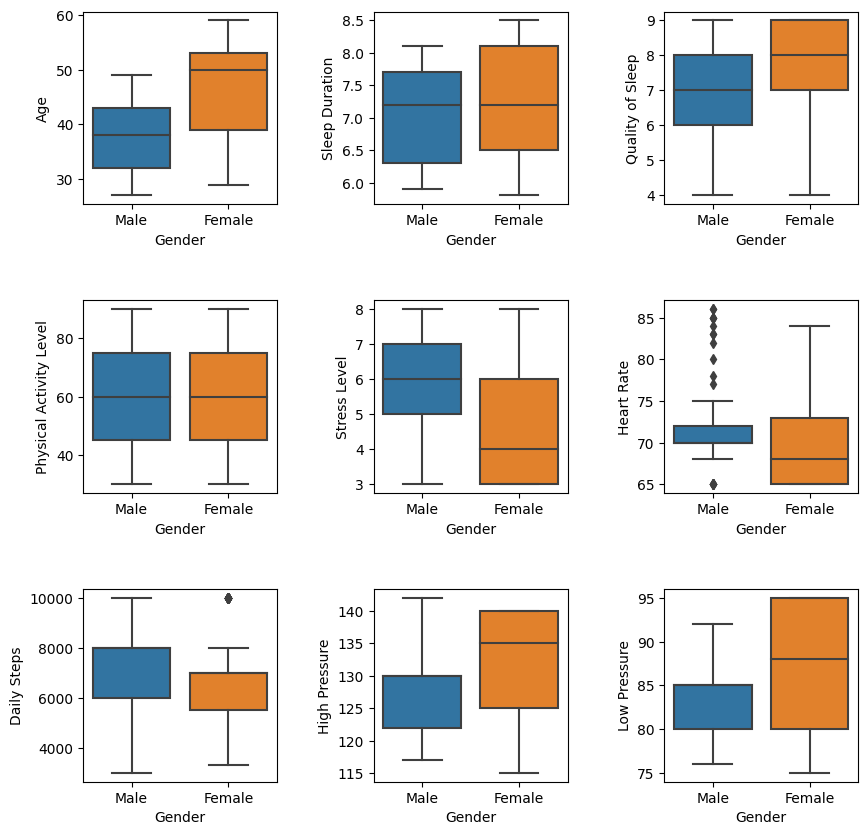

In [121]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, ax in enumerate(axs.flat):
    sns.boxplot(x='Gender', y=numeric[i], data=df, ax=ax)

plt.show()

**Analysis in Relation to Sleep Disorder**

<Axes: title={'center': 'Variable BMI Category'}, xlabel='BMI Category', ylabel='count'>

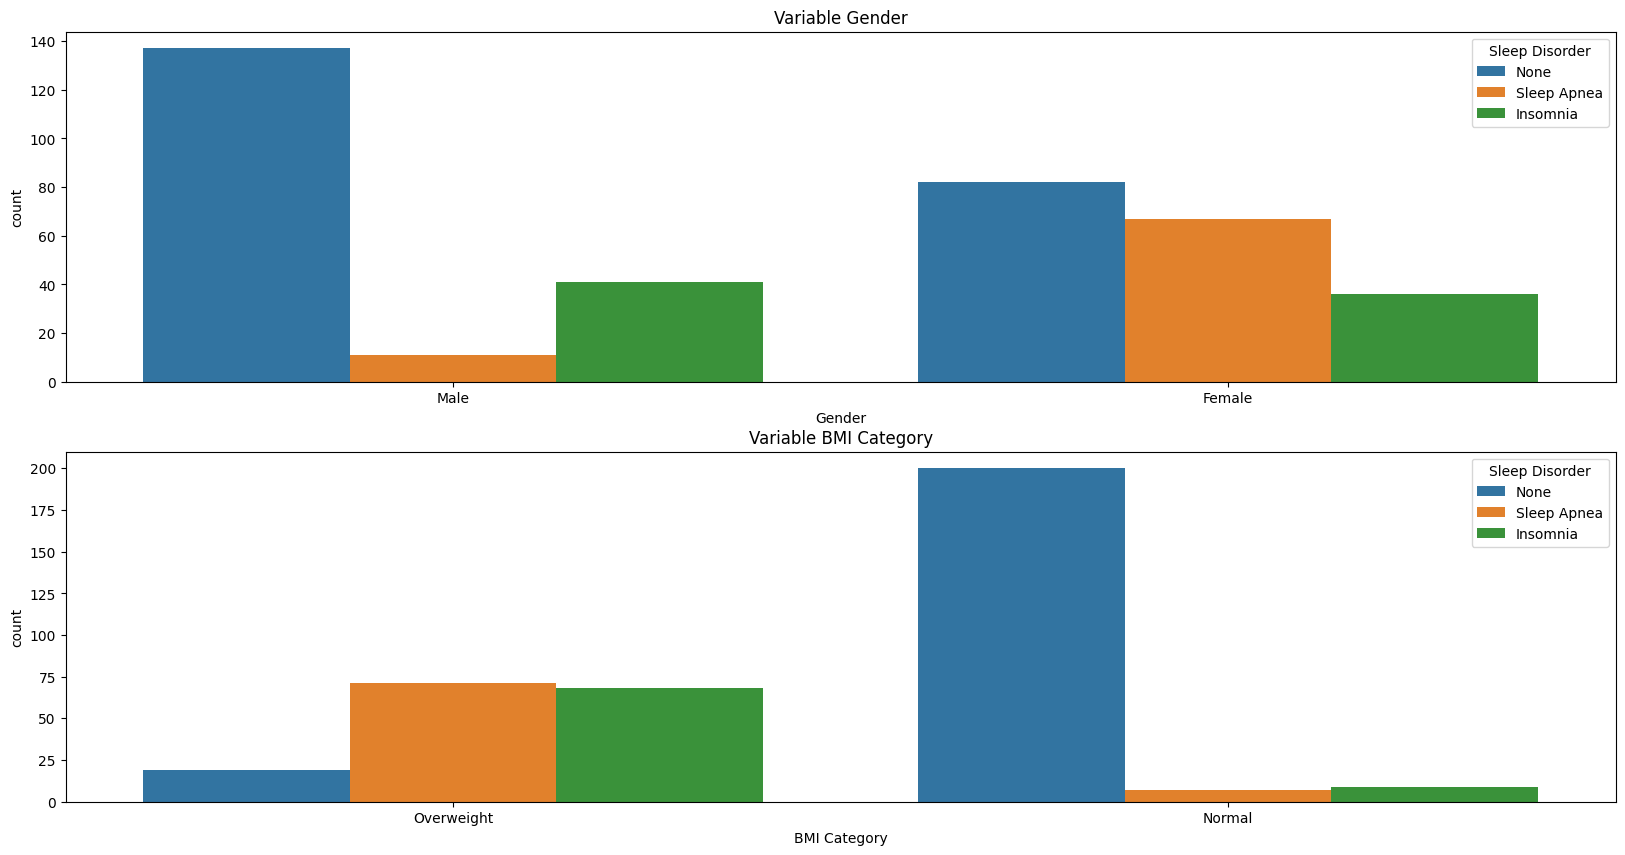

In [122]:
plt.figure(figsize = (20, 10))
plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Sleep Disorder', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable BMI Category')
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = df)

In [123]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [124]:
fig=px.histogram(df,x='Sleep Disorder', barmode="group", color='Sleep Disorder', text_auto=True)
fig.update_yaxes(showgrid=False)
fig.update_layout(title='<b>Sleep Disorder Counts</b>', title_font={'size':20})

fig.show()

In [125]:
df.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
None            Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

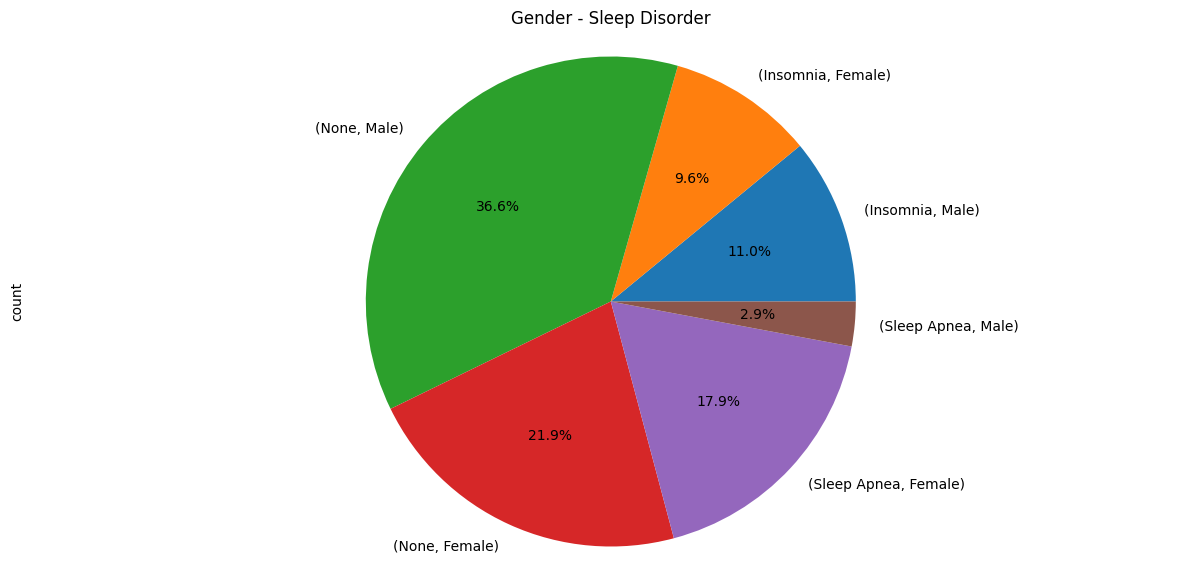

In [126]:
df.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(15,7))
plt.title('Gender - Sleep Disorder')
plt.axis('equal')
plt.show()

In [127]:
jobs=df['Occupation'].unique()
print('Types of jobs:', jobs)

Types of jobs: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [128]:
fig=px.treemap(df,path=[px.Constant('Jobs'),'Sleep Disorder','Occupation'], color='Sleep Disorder')
fig.update_layout(title='<b>Occupation - Sleep Disorder</b>', title_font={'size':20})

fig.show()

In [129]:
fig=px.sunburst(df,path=[px.Constant('Sleep quality'),'Sleep Disorder','Quality of Sleep'],
               color='Sleep Disorder',values='Sleep Duration', hover_data=['Gender'])
fig.update_layout(title='<b>Quality of Sleep - Sleep Disorder</b>', title_font={'size':20})

fig.show()

In [130]:
fig = px.violin(df, x="Sleep Disorder",y='Physical Activity Level',color='Sleep Disorder', violinmode='overlay')
fig.update_yaxes(showgrid=False)
fig.update_layout(title='<b>Physical Activity Level - Sleep Disorder</b>', title_font={'size':20})

fig.show()

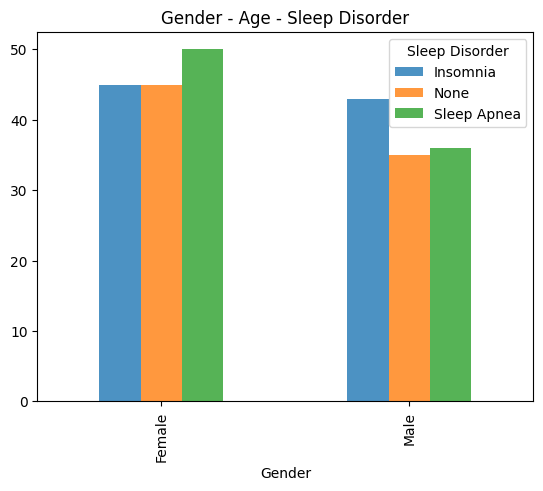

In [131]:
df.pivot_table(index='Gender',columns='Sleep Disorder',values='Age', aggfunc='median').plot(kind='bar',title='Gender - Age - Sleep Disorder',label='Age',alpha=.8)

plt.show()

In [132]:
# Boxplot by Sleep Disorder
fig=px.box(df, x='Sleep Disorder', y='Sleep Duration', color='Sleep Disorder')
fig.update_layout(title='Sleep Duration - Sleep Disorder')

fig.show()

In [133]:
fig=px.ecdf(df,x='Age', color='Sleep Disorder')
fig.update_layout(title='<b>Age - Sleep Disorder </b>', title_font={'size':20})
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [134]:
fig=px.histogram(df, x='Sleep Disorder',color='Sleep Disorder',facet_col='Stress Level',barmode='group', opacity=.8)
fig.update_layout(title='<b>Stress Level - Sleep Disorder</b>',title_font={'size': 20})
fig.update_yaxes(showgrid=False)

fig.show()

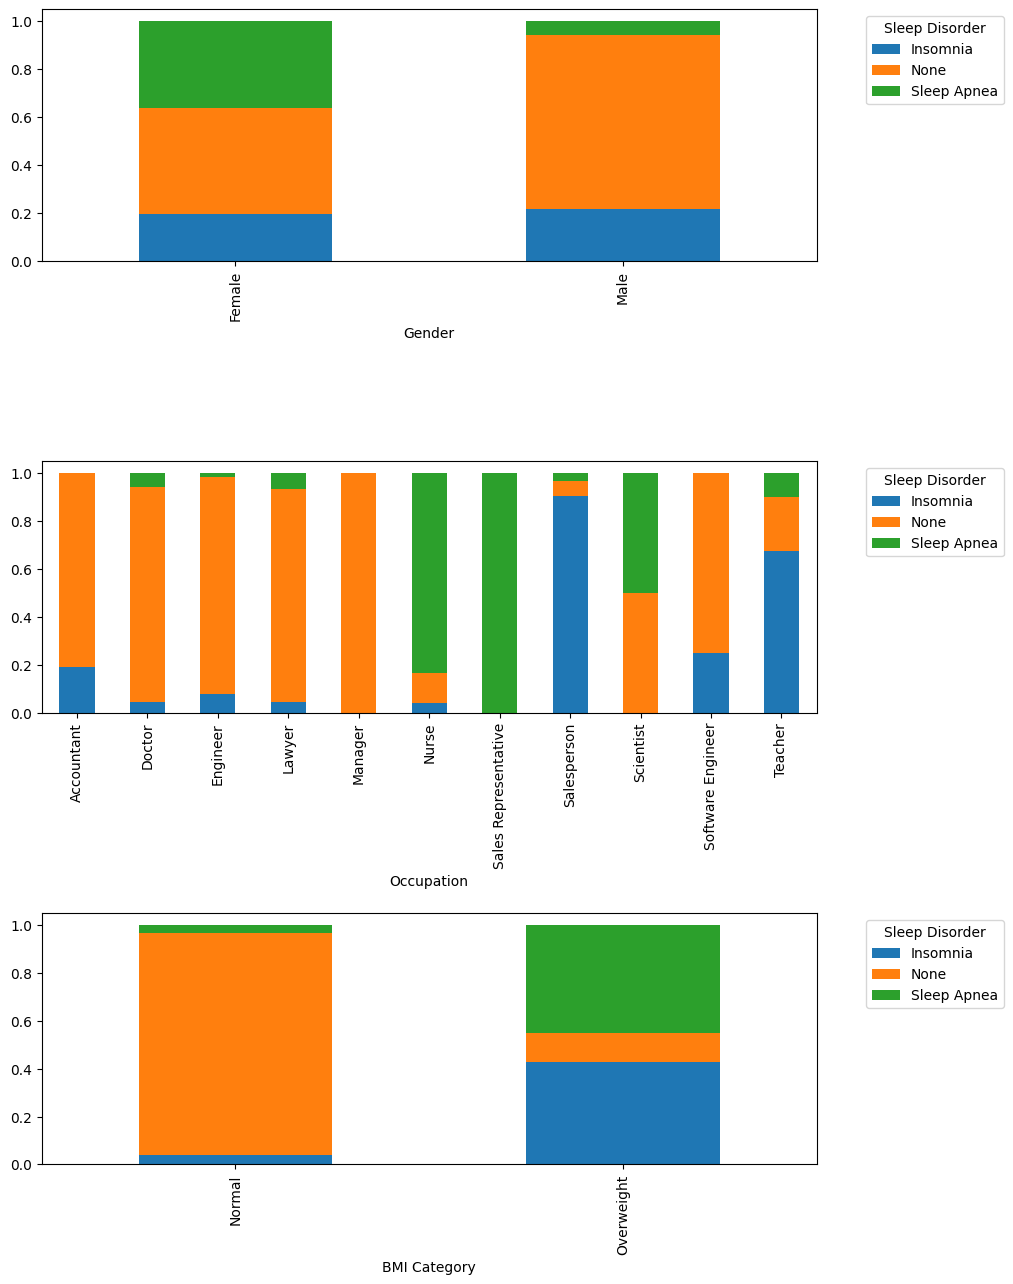

In [135]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.8)

categorically = ["Gender", "Occupation", "BMI Category"]

for i,cat in enumerate(categorically):
    counts = (df.groupby([cat])['Sleep Disorder'].value_counts(normalize=True).unstack())
    ax = counts.plot(kind='bar', stacked=True, ax=axs[i])
    ax.legend(title='Sleep Disorder', loc='upper right', bbox_to_anchor=(1.25, 1))


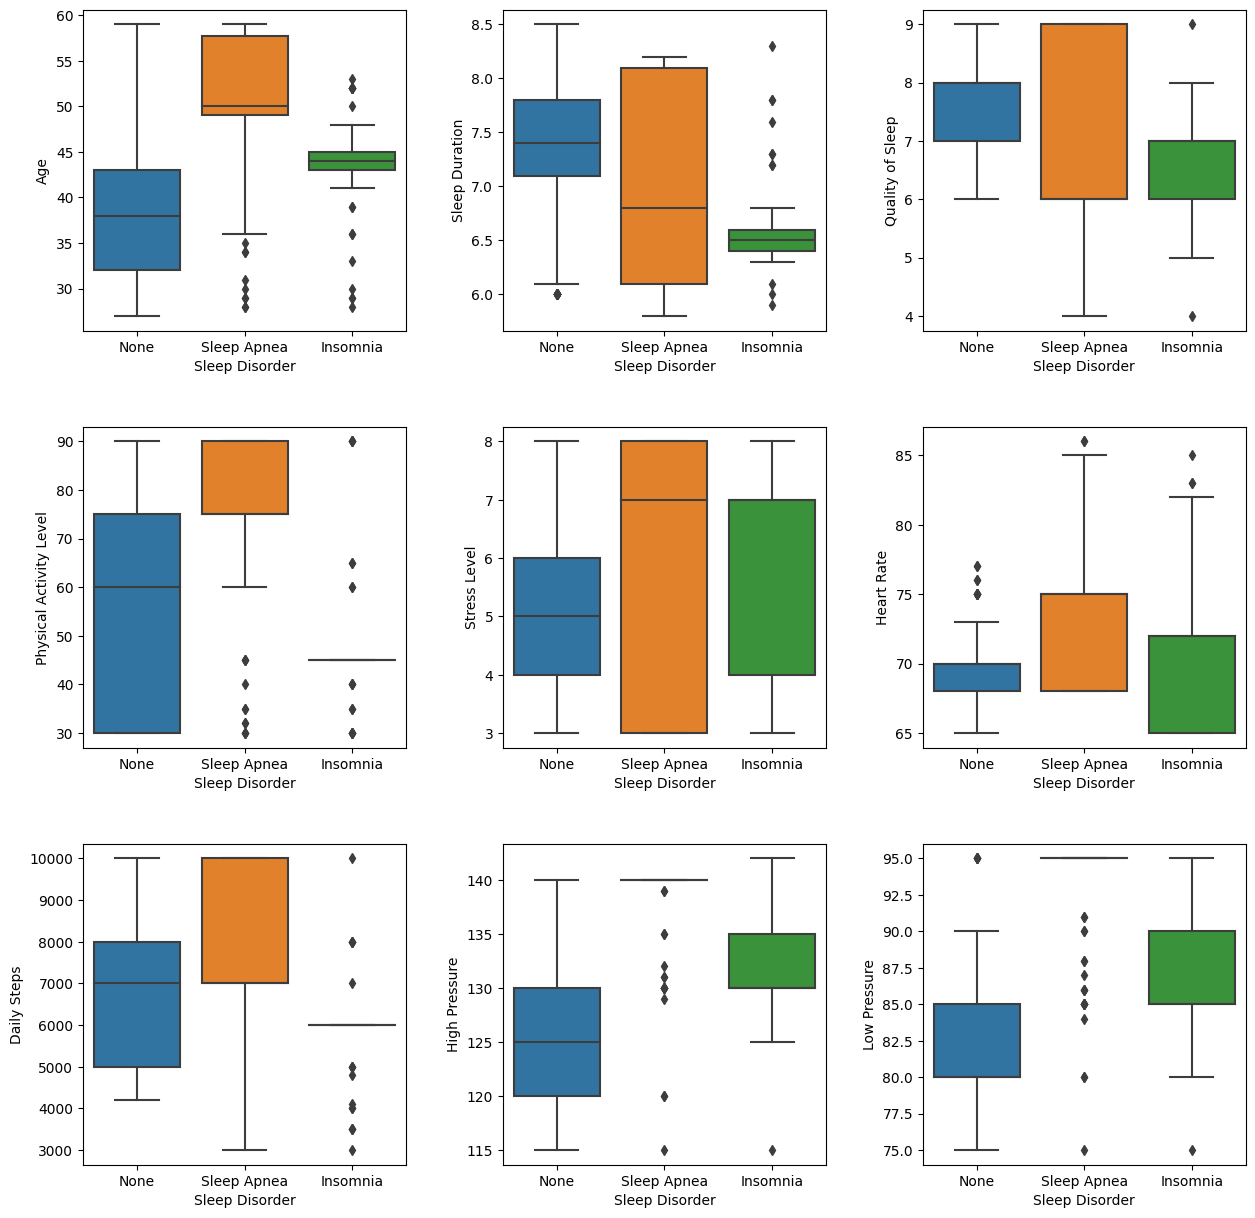

In [136]:
# Create a grid of plots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Iterate over pairs of parameters
for i, ax in enumerate(axs.flat):
    sns.boxplot(x='Sleep Disorder', y=numeric[i], data=df, ax=ax)

plt.show()

# **Correlation Analysis** <a class="anchor"  id="correlation"></a>

In [137]:
#import label encoder
from sklearn import preprocessing 

df1 = df.copy()
label_encoder = preprocessing.LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1['Occupation'] = label_encoder.fit_transform(df1['Occupation'])
df1['BMI Category'] = label_encoder.fit_transform(df1['BMI Category'])
df1['Sleep Disorder'] = label_encoder.fit_transform(df1['Sleep Disorder'])
df1.drop('Blood Pressure', axis = 1, inplace = True)
df1.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,High Pressure,Low Pressure
0,1,1,27,9,6.1,6,42,6,1,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,4,1,28,6,5.9,4,30,8,1,85,3000,2,140,90
4,5,1,28,6,5.9,4,30,8,1,85,3000,2,140,90


In [138]:
fig = px.imshow(df1.corr())
fig.show()

In [139]:
# min(df['Physical Activity Level'])

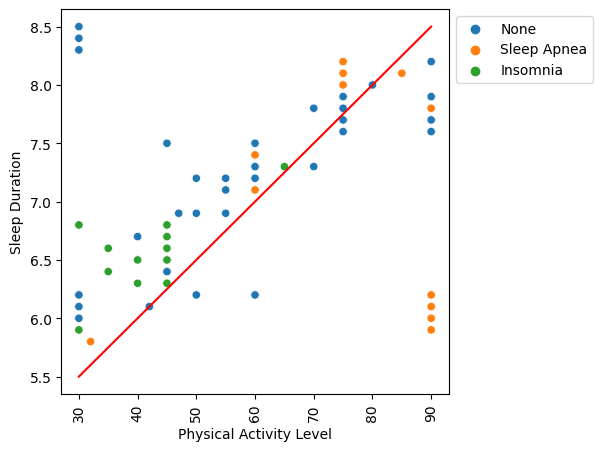

In [140]:
plt.figure(figsize=(5, 5))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df['Physical Activity Level'],y=df['Sleep Duration'],hue=df['Sleep Disorder'],data=df,sizes=(50,500))
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
x_lim = [30,90]
y_lim = [5.5,8.5]
plt.plot(x_lim, y_lim,color="red");

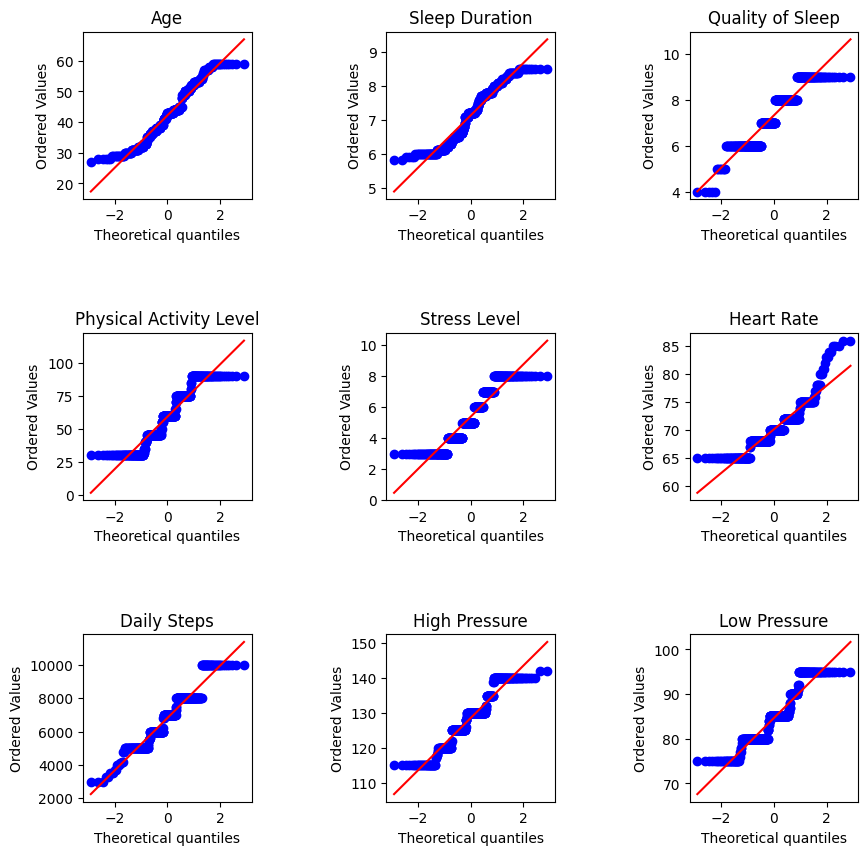

In [141]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

for i, ax in enumerate(axs.flat):
    probplot(df[numeric[i]], plot=axs[int(i/3), i%3])
    ax.set_title(numeric[i])

plt.show()

In [142]:
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,High Pressure,Low Pressure
0,1,1,27,9,6.1,6,42,6,1,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,4,1,28,6,5.9,4,30,8,1,85,3000,2,140,90
4,5,1,28,6,5.9,4,30,8,1,85,3000,2,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,1,68,7000,2,140,95
370,371,0,59,5,8.0,9,75,3,1,68,7000,2,140,95
371,372,0,59,5,8.1,9,75,3,1,68,7000,2,140,95
372,373,0,59,5,8.1,9,75,3,1,68,7000,2,140,95


In [143]:
X = df1.drop(columns=['Sleep Disorder','Person ID'], axis = 1).values
y = df1['Sleep Disorder']

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 100)

In [146]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
from sklearn.model_selection import RandomizedSearchCV
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  6
Max Nvl:  5
Algorithm:  entropy
Score:  0.9080459770114943


Acc = 0.911504424778761


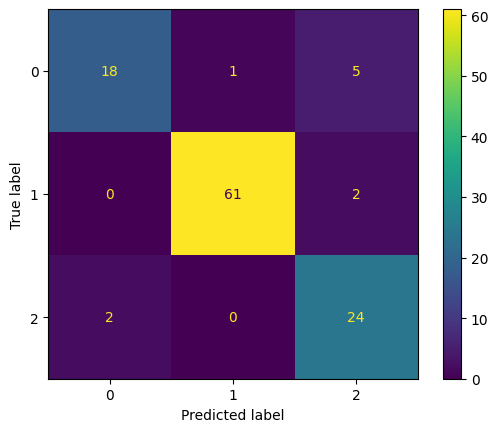

In [147]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
dt = DecisionTreeClassifier(criterion = gridDecisionTree.best_estimator_.criterion, 
                                       min_samples_split = gridDecisionTree.best_estimator_.min_samples_split, 
                                       max_depth= gridDecisionTree.best_estimator_.max_depth)

dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
print(f'Acc = {dt.score(X_test, y_test)}')
cm = ConfusionMatrixDisplay(confusion_matrix=conf).plot()

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.98      0.97      0.98        63
           2       0.77      0.92      0.84        26

    accuracy                           0.91       113
   macro avg       0.89      0.88      0.88       113
weighted avg       0.92      0.91      0.91       113



In [149]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)

gridRandomForest.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_split=6)

0.9292035398230089


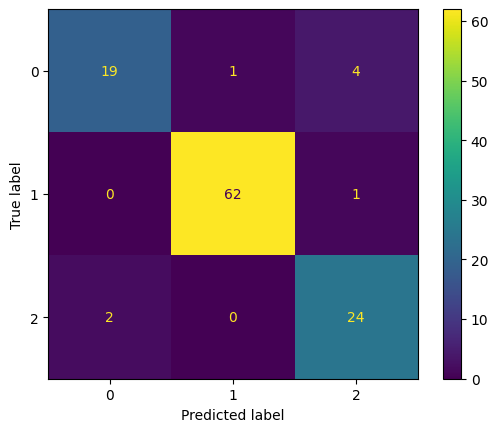

In [150]:
rf = RandomForestClassifier(n_estimators = 100,
                            min_samples_split = gridRandomForest.best_estimator_.min_samples_split,
                            max_depth= gridRandomForest.best_estimator_.max_depth,
                            criterion = gridRandomForest.best_estimator_.criterion,
                            random_state = 0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
print(rf.score(X_test, y_test))
cm = ConfusionMatrixDisplay(confusion_matrix=conf).plot()

In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.98      0.98      0.98        63
           2       0.83      0.92      0.87        26

    accuracy                           0.93       113
   macro avg       0.91      0.90      0.90       113
weighted avg       0.93      0.93      0.93       113



0.9203539823008849


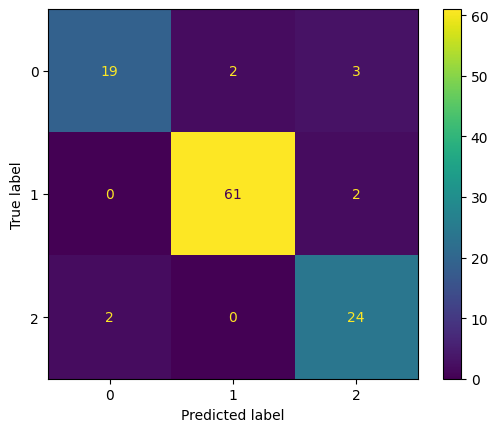

In [152]:
from sklearn.linear_model import LogisticRegression
Lore = LogisticRegression(solver = 'liblinear', random_state = 1, max_iter=10000, C=0.1)
Lore.fit(X_train,y_train)
y_pred = Lore.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
print(Lore.score(X_test, y_test))
cm = ConfusionMatrixDisplay(confusion_matrix=conf).plot()

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.97      0.97      0.97        63
           2       0.83      0.92      0.87        26

    accuracy                           0.92       113
   macro avg       0.90      0.89      0.90       113
weighted avg       0.92      0.92      0.92       113



0.9203539823008849


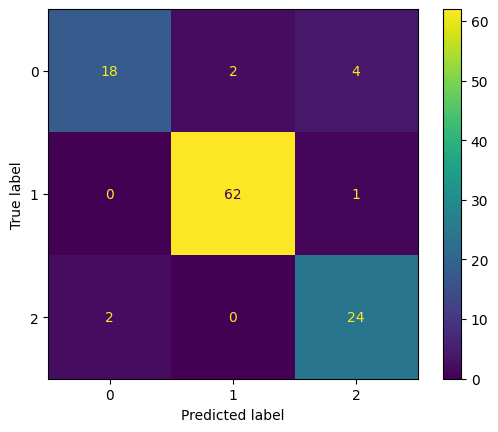

In [154]:
from sklearn.svm import SVC
Svm_clf = SVC(kernel='poly',gamma='auto',C=10)
Svm_clf.fit(X_train,y_train)
y_pred = Svm_clf.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
print(Svm_clf.score(X_test, y_test))
cm = ConfusionMatrixDisplay(confusion_matrix=conf).plot()

In [155]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.97      0.98      0.98        63
           2       0.83      0.92      0.87        26

    accuracy                           0.92       113
   macro avg       0.90      0.89      0.89       113
weighted avg       0.92      0.92      0.92       113



In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

k_list = list(range(1,25))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)


grid.best_params_, grid.best_score_

({'n_neighbors': 6}, 0.873429242513212)

0.911504424778761


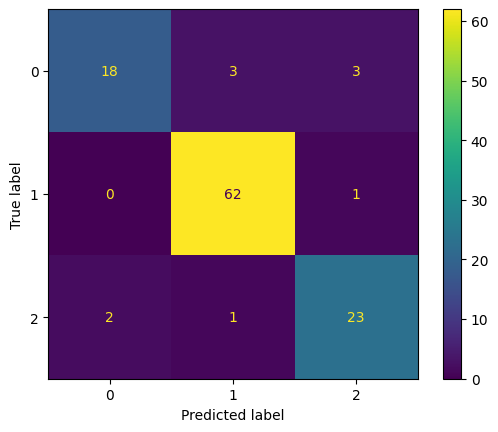

In [157]:
knn = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'], metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
print(knn.score(X_test, y_test))
cm = ConfusionMatrixDisplay(confusion_matrix=conf).plot()

In [158]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.94      0.98      0.96        63
           2       0.85      0.88      0.87        26

    accuracy                           0.91       113
   macro avg       0.90      0.87      0.88       113
weighted avg       0.91      0.91      0.91       113



In [159]:
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint
parameters = {'learning_rate': [0.005,0.01,0.05,0.1,0.5,1],
              'n_estimators': [300,500]
             }


model = GradientBoostingClassifier()
gridGradient = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridGradient.fit(X_train, y_train)

print('best estimator: ', gridGradient.best_estimator_)
print('Score: ', gridGradient.best_score_)

best estimator:  GradientBoostingClassifier(learning_rate=0.005, n_estimators=300)
Score:  0.907910014513788


0.9203539823008849


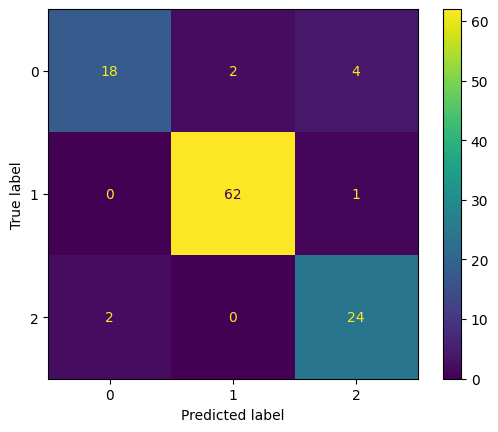

In [160]:
grad_boost = GradientBoostingClassifier(n_estimators = gridGradient.best_params_['n_estimators'], learning_rate = gridGradient.best_params_['learning_rate'], random_state = 0)
grad_boost.fit(X_train, y_train)
y_pred = grad_boost.predict(X_test)


conf = confusion_matrix(y_test, y_pred)
print(grad_boost.score(X_test, y_test))
cm = ConfusionMatrixDisplay(confusion_matrix=conf).plot()

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.97      0.98      0.98        63
           2       0.83      0.92      0.87        26

    accuracy                           0.92       113
   macro avg       0.90      0.89      0.89       113
weighted avg       0.92      0.92      0.92       113

